In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import toolbelt

In [2]:
df = pd.read_csv('./titanic/train.csv', index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df[pd.isnull(df.Embarked)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
df[df.Fare==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
y_col = "Survived"
uids = ["Cabin", "Ticket", "Name"]
Xs_categorical = ["Pclass", "Sex", "Embarked"]
Xs_cont = ["Age", "SibSp", "Parch", "Fare"]

# What we need to accomplish
1. Fill nulls in age and embarked
2. Create feature from Cabin

In [8]:
df.Age = df.Age.fillna(df.Age.mean())

In [9]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df.Embarked = df.Embarked.fillna('S')

In [11]:
df['no_cabin'] = df.Cabin.isnull().astype(int)

# Deal with skewed fare value

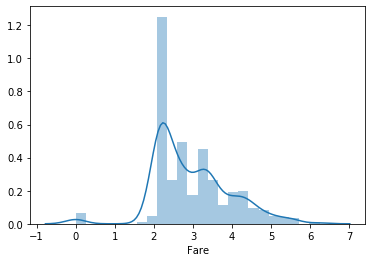

In [12]:
sns.distplot(np.log1p(df.Fare))

In [13]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
df.Fare = np.log1p(df.Fare)

In [15]:
y_col = "Survived"
Xs_categorical = ["Pclass", "Sex", "Embarked", "no_cabin"]
Xs_cont = ["Age", "SibSp", "Parch", "Fare"]

In [16]:
df.Pclass = df.Pclass.astype(str)

In [17]:
#df2 = pd.get_dummies(df[[y_col] + Xs_categorical + Xs_cont], drop_first=True)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
y = df.Survived.values

In [20]:
y.shape

(891,)

In [21]:
X = pd.get_dummies(df[Xs_categorical + Xs_cont]).values
X.shape

(891, 13)

X -> x1, x2, ... , x13

In [22]:
X_scaled = StandardScaler().fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

# Three "Chunks" of data
1. Train - majority of the data
2. Validation - as you are training, check your work (as big as you can make it)
3. Test (interchangeable with validation) - hold to the very end to check final result (kaggle holdout) 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((668, 13), (223, 13), 0.3787425149700599, 0.3991031390134529)

In [26]:
from sklearn.ensemble import RandomForestClassifier

decision tree:

1. if age > 23 (right branch, left branch) 
2 (right branch) if embarked_S == 1...
2 (left branch) if sex_female == 1....

end of branch -> target = 1 or 0

In [27]:
rfc = RandomForestClassifier(n_estimators=256, criterion='entropy', n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
pred_y = rfc.predict(X_test)

cm = sklearn.metrics.confusion_matrix(y_test, pred_y)
tn, fp, fn, tp = cm.ravel()
print('   A1\tA0\nP1[{}\t{}\t]\nP0[{}\t{}\t]'.format(tp, fp, fn, tn), end='\n\n')
print(f'precision: {tp/(tp+fp)}')
print(f'recall: {tp/(tp+fn)}')
print(f'log loss: {sklearn.metrics.log_loss(y_test, rfc.predict_proba(X_test))}')
print(f'type1 error: {fp}')

   A1	A0
P1[64	20	]
P0[25	114	]

precision: 0.7619047619047619
recall: 0.7191011235955056
log loss: 0.7215426662645342
type1 error: 20


In [28]:
rfc.feature_importances_

array([0.03279373, 0.26345558, 0.05186184, 0.03978924, 0.26083609,
       0.01776553, 0.02267435, 0.04417906, 0.11351944, 0.11653042,
       0.01377887, 0.00821008, 0.01460578])